In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Target

In [7]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Plot Target vs Numeric

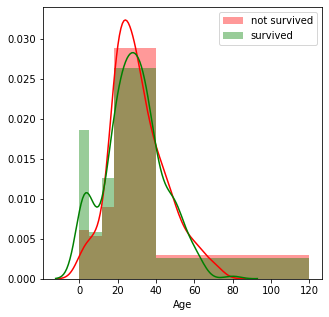

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color="r", label="not survived")
sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color="g", label="survived")
plt.legend()

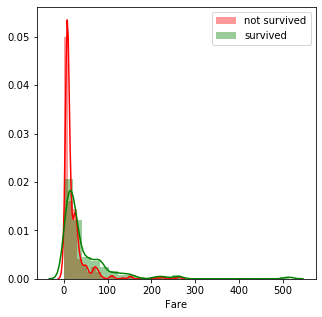

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survived")
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survived")
plt.legend()

## Plot Target vs Categorical

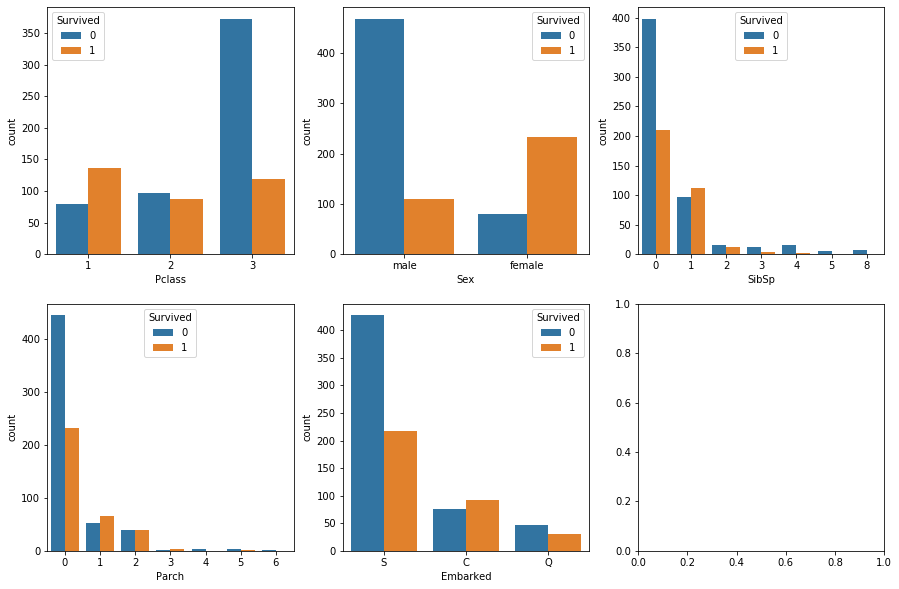

In [37]:
cat_var = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()) :
    sns.countplot(cat, data=df, ax=ax, hue="Survived")

In [39]:
pd.crosstab(df.Pclass, df.Survived, normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## Add Feature

In [75]:
df["Is_alone"] = (df.Parch == 0) & (df.SibSp == 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


## Binning

In [76]:
df["Age_bin"] = pd.cut(df.Age, [0, 5, 12, 20, 40, 120], labels=["balita", "anak", "remaja", "dewasa", "tua"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone,Age_bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,dewasa
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,dewasa
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,dewasa
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,dewasa
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,dewasa


In [77]:
df.Fare.max()

512.3292

In [119]:
df["Fare_bin"] = pd.cut(df.Fare, [0, 25, 50, 100, 600], labels=["murah", "sedang", "mahal", "vip"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone,Age_bin,Fare_bin
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,dewasa,murah
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,dewasa,mahal
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,dewasa,murah
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,dewasa,mahal
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,dewasa,murah


## Import Package

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

## Data Splitting

In [120]:
X = df.drop(columns=["Survived", "Name", "Age", "Cabin", "Fare", "Ticket"])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [121]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Is_alone,Age_bin,Fare_bin
PassengerId,,,,,,,,
1,3,male,1,0,S,False,dewasa,murah
2,1,female,1,0,C,False,dewasa,mahal
3,3,female,0,0,S,True,dewasa,murah
4,1,female,1,0,S,False,dewasa,mahal
5,3,male,0,0,S,True,dewasa,murah


## Preprocessing

In [122]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])


preprocessing = ColumnTransformer([
    ("numeric", numerical_pipeline, ["SibSp", "Parch"]),
    ("categoric", categorical_pipeline, ["Pclass", "Embarked", "Sex", "Is_alone", "Age_bin", "Fare_bin"])
])

pipeline = Pipeline([
    ("prep", preprocessing),
    ("algo", KNeighborsClassifier())
])

parameter = {
    "algo__n_neighbors" : range(1, 51, 2),
    "algo__weights" : ["uniform", "distance"],
    "algo__p" : [1, 2]
}

model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                        

In [123]:
print(model.score(X_train, y_train), model.best_params_, model.score(X_test, y_test))

0.8778089887640449 {'algo__n_neighbors': 5, 'algo__p': 2, 'algo__weights': 'distance'} 0.8100558659217877
